In [1]:
'''We will be perform regression between time Avocardo Volume p[1] and Avocardo Price p[0]'''

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def compute_error_for_given_points(b, m, points):
    # Sum of Square errors
    err = 0
    for point in  points:
        err += (point[1] - (m * point[0] + b ))**2
    return err / len(points)

In [8]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    # init
    b = starting_b
    m = starting_m

    for _ in range(num_iterations):
        b, m = gradient(b, m, points, learning_rate)
        # show_points_and_line(points, m, b)

    return b, m

In [4]:
def gradient(current_b, current_m, points, learning_rate):
    b_gradient = 0
    m_gradient = 0

    for point in points:
        x = point[0]
        y = point[1]
        # get direction withrespect to b and m
        m_gradient += (x * (y - (current_m * x + current_b)))
        b_gradient += (y - (current_m * x + current_b))

    m_gradient = -2/len(points) * m_gradient
    b_gradient = -2/len(points) * b_gradient

    # Update b and m
    new_b = current_b - (learning_rate * b_gradient)
    new_m = current_m - (learning_rate * m_gradient)

    return new_b, new_m

In [5]:
def show_points_and_line(points, m, b):
    min_x, max_x = points[0, 0], points[0, 0]
    for point in points:
        plt.plot(point[0], point[1], 'o', color='blue')
        if min_x>point[0]:
            min_x=point[0]
        elif max_x<point[0]:
            max_x=point[0]
    plt.plot([min_x, max_x], [(m*min_x+b), (m*max_x+b)], color='red')
    plt.gca().set(xlabel="Volume", ylabel="Average price", title='Volume VS Price')
    plt.legend(['Avocado'])
    plt.show()

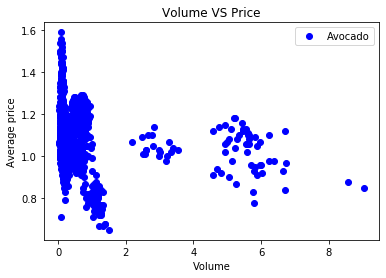

In [6]:
points = np.genfromtxt('avocado.csv', delimiter=',', max_rows=800)
point_temp = []
for point in points:
    #  Volume and AveragePrice
    point_temp.append([point[3]/1000000, point[2]])
point_temp.pop(0)
points = np.array(point_temp) 

for point in points:
    plt.plot(point[0], point[1], 'o', color='blue')
plt.gca().set(xlabel="Volume", ylabel="Average price", title='Volume VS Price')
plt.legend(['Avocado'])
plt.show()

In [7]:
learning_rate = 0.0005
# # # y = mx + c
init_b = 0
init_m = 0
num_iterations = 10000

In [9]:
print(f"Starting gradient descent at b = {init_b}, m = {init_b}, error = {compute_error_for_given_points(init_b, init_m, points)}")
b, m = gradient_descent_runner(points, init_b, init_m, learning_rate, num_iterations)
print(f"Ending gradient descent at b = {b}, m = {m}, error = {compute_error_for_given_points(b, m, points)}")

Starting gradient descent at b = 0, m = 0, error = 1.1978513141426752
Ending gradient descent at b = 1.1008865917052781, m = -0.022610789291027177, error = 0.02299378054869575


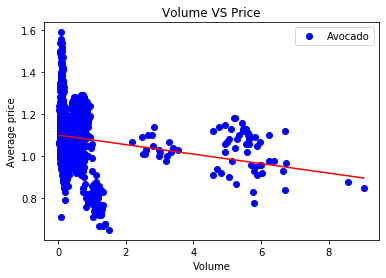

In [10]:
show_points_and_line(points, m, b)